In [1]:
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas as pd
import sklearn
import numpy as np
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Step 1: Load the dataset

In [11]:

data = pd.read_csv("/content/SMSSpamCollection",sep='\t', quoting=csv.QUOTE_NONE,
                           names=["class", "sms"])
data

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


#Step 2: Preprocess the data





In [12]:
# data cleaning
data.isnull

def preprocess_sms(message):
    message = message.lower()
    words = word_tokenize(message) #tokenize
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return words

# Encode classes
data['class'] = data['class'].map({'spam': 1, 'ham': 0})

print(data['class'].value_counts())

class
0    4827
1     747
Name: count, dtype: int64


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

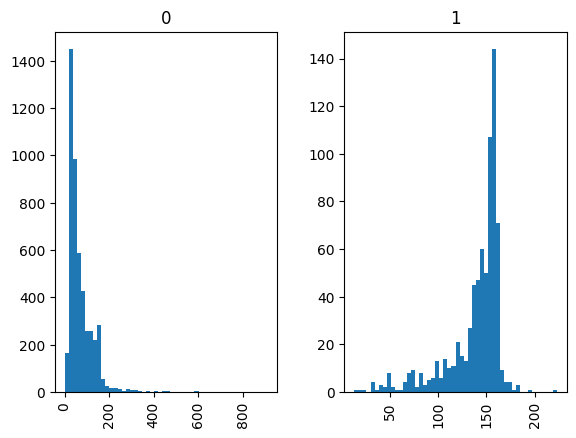

In [14]:
## Distribution of length of sms for spam and ham
data['length'] = data['sms'].map(lambda text: len(text))
data.hist(column='length', by='class', bins=50)

Converting text to vectors

In [15]:
bow_transformer = CountVectorizer(analyzer=preprocess_sms).fit(data['sms'])
print(len(bow_transformer.vocabulary_))

8109


In [16]:
message1 = data['sms'][6]
print(message1)

Even my brother is not like to speak with me. They treat me like aids patent.


In [17]:
vector = bow_transformer.transform([message1])
print(vector)

  (0, 828)	1
  (0, 1517)	1
  (0, 2732)	1
  (0, 4281)	2
  (0, 5318)	1
  (0, 6665)	1
  (0, 7372)	1


In [18]:
len(data['sms'])
print(bow_transformer.vocabulary_)

{'go': 3270, 'jurong': 4021, 'point': 5505, 'crazy': 2091, 'available': 1113, 'bugis': 1546, 'n': 4866, 'great': 3350, 'world': 7952, 'la': 4146, 'e': 2557, 'buffet': 1544, 'cine': 1828, 'got': 3313, 'amore': 896, 'wat': 7752, 'ok': 5118, 'lar': 4182, 'joking': 3991, 'wif': 7861, 'u': 7454, 'oni': 5143, 'free': 3083, 'entry': 2687, '2': 314, 'wkly': 7912, 'comp': 1934, 'win': 7872, 'fa': 2818, 'cup': 2150, 'final': 2935, 'tkts': 7259, '21st': 328, 'may': 4586, 'text': 7128, '87121': 635, 'receive': 5878, 'question': 5772, 'std': 6781, 'txt': 7440, 'rate': 5824, 'c': 1590, 'apply': 976, '08452810075over18': 63, 'dun': 2543, 'say': 6205, 'early': 2563, 'hor': 3626, 'already': 874, 'nah': 4873, 'think': 7180, 'goes': 3278, 'usf': 7572, 'lives': 4330, 'around': 1024, 'though': 7198, 'freemsg': 3090, 'hey': 3548, 'darling': 2204, '3': 391, 'week': 7793, 'word': 7943, 'back': 1159, 'like': 4281, 'fun': 3145, 'still': 6804, 'tb': 7070, 'xxx': 8015, 'chgs': 1783, 'send': 6296, 'rcv': 5836, 'ev

In [20]:
sms_bow = bow_transformer.transform(data['sms'])

In [21]:
tfidf_transformer = TfidfTransformer().fit(sms_bow)
tfidf4 = tfidf_transformer.transform(vector)
print(tfidf4)

  (0, 828)	0.4542027590842584
  (0, 1517)	0.334644599949195
  (0, 2732)	0.279598051728072
  (0, 4281)	0.4263264477585127
  (0, 5318)	0.4542027590842584
  (0, 6665)	0.31014503336808275
  (0, 7372)	0.34538883406086385


In [22]:
sms_tfidf = tfidf_transformer.transform(sms_bow)
print(sms_tfidf.shape)
sms_tfidf = pd.DataFrame(sms_tfidf.todense())
sms_tfidf.head()

(5574, 8109)


,0,1,2,3,4,5,6,7,8,9,...,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 3: Split the data into train/validation/test

In [26]:
# Split data
X = sms_tfidf
y = data['class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=60)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=60)

# Step 4: Store the splits at train.csv/validation.csv/test.csv


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('dataset/train.csv', index=False)
val_data.to_csv('dataset/validation.csv', index=False)
test_data.to_csv('dataset/test.csv', index=False)